# **Table of Contents**
* [Part 1 - Intro](#section_11)
* [Part 2 - EDA](#section_12)
* [Part 3 - Nan](#section_13)
* [Part 4 - Encode , Impute , Transform](#section_14)
* [Part 5 - Feature Selection](#section_15)
* [Part 6 - Model Building](#section_16)
* [Part 7 - Submission](#section_17)

In [1]:
import  numpy              as np
import  pandas             as pd
import  matplotlib.pyplot  as plt
import  seaborn            as sns

import warnings
warnings.filterwarnings("ignore")

<a id='section_11'></a>
# **Part 1 - Intro**

## **1.1 - Read**

In [2]:
train = pd.read_csv ('dataset/Credit_Card_Lead_train.csv')

test  = pd.read_csv ('dataset/Credit_Card_Lead_test.csv')

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
train.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [5]:
train.drop ( ['ID' ] , axis=1 , inplace=True )
test.drop  ( ['ID' ] , axis=1 , inplace=True )

In [6]:
print ( train.shape )
print ( test.shape  )

(245725, 10)
(105312, 9)


## **1.2 - Col info**

In [7]:
print ( train.info () )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB
None


<a id='section_12'></a>
# **Part 2 - EDA**

##  **2.1 - Univariate Analysis**

###  **2.1.1 - For Categorical Features**

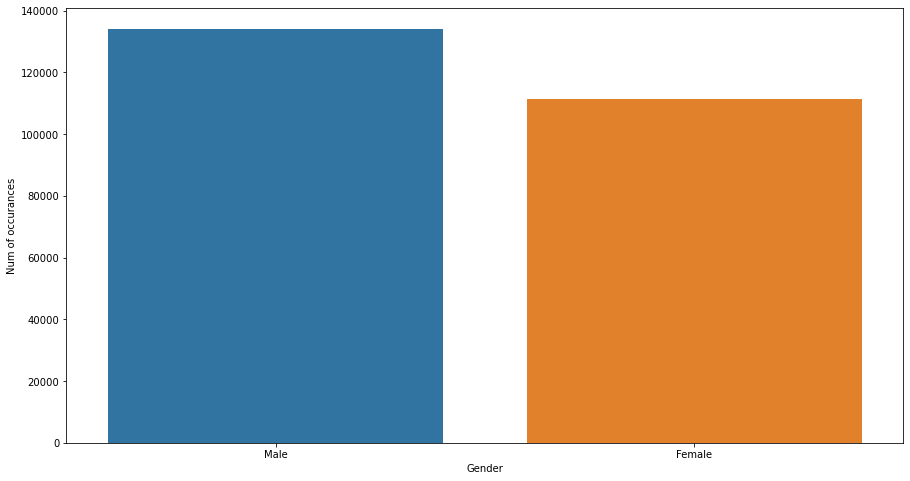

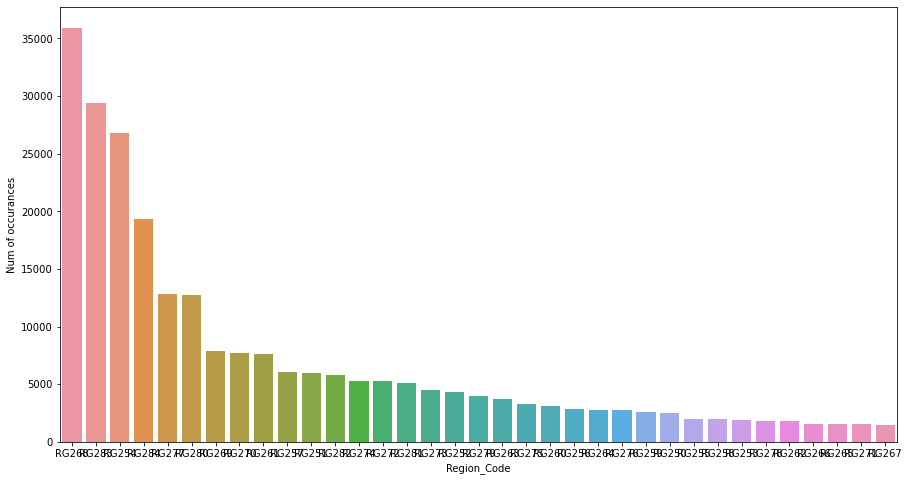

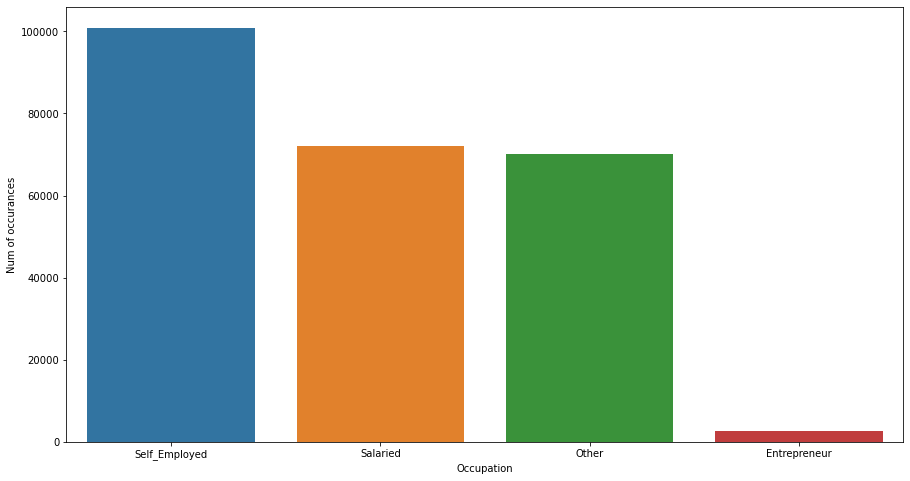

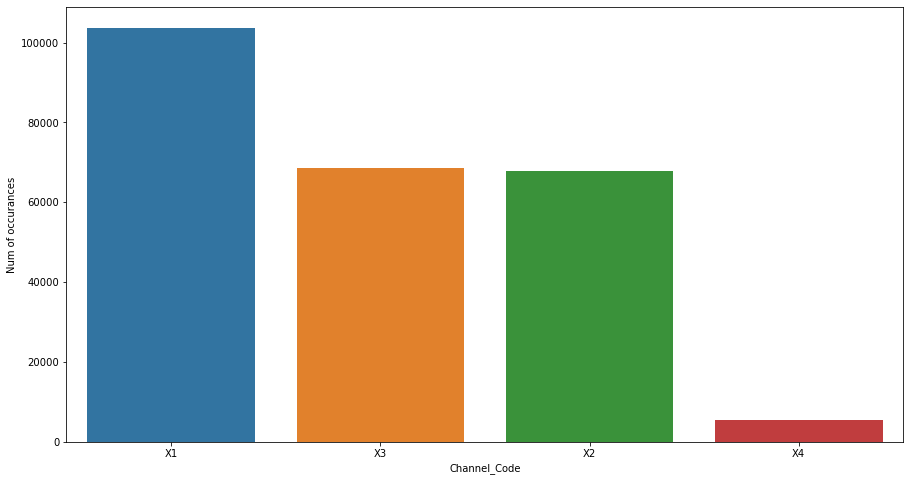

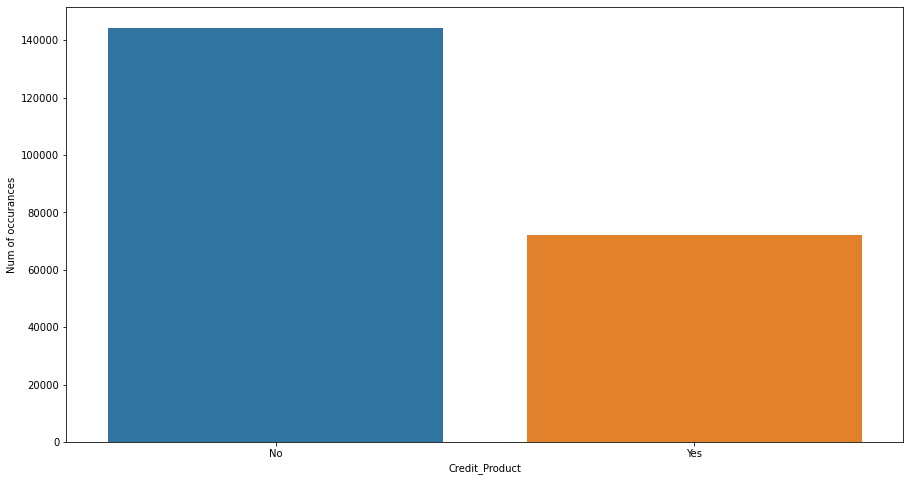

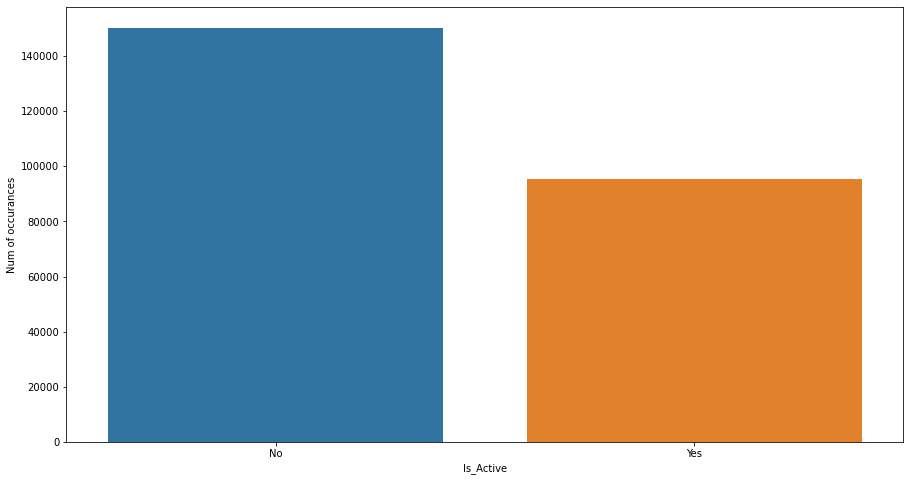

In [8]:
for i in [ 'Gender'  , 'Region_Code' , 'Occupation' , 'Channel_Code' , 'Credit_Product' , 'Is_Active' ]:
    
    vc = train[i].value_counts()

    plt.figure(figsize=(15,8))
    
    sns.barplot(x =vc.index.values, y =vc.values, order =vc.index)
    
    plt.xlabel(i)
    plt.ylabel('Num of occurances')

### **2.1.2 - For Numeric Feature**

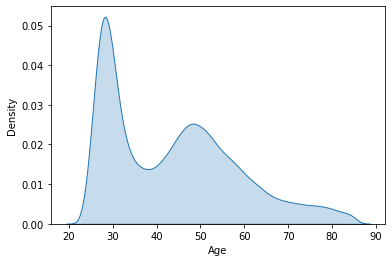

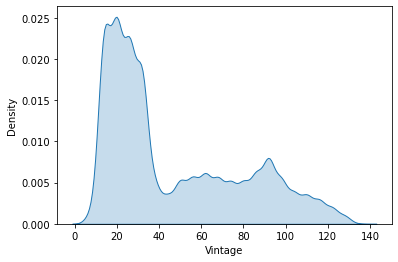

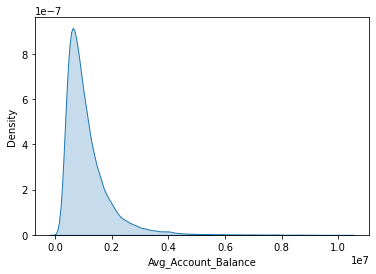

In [9]:
for i in [  'Age' , 'Vintage' ,'Avg_Account_Balance' ]:
    
    sns.kdeplot ( train[i] , shade=True )
    plt.show()

## **2.2 - Bivariate Analysis**

### **2.2.1 - Categorical Cols**

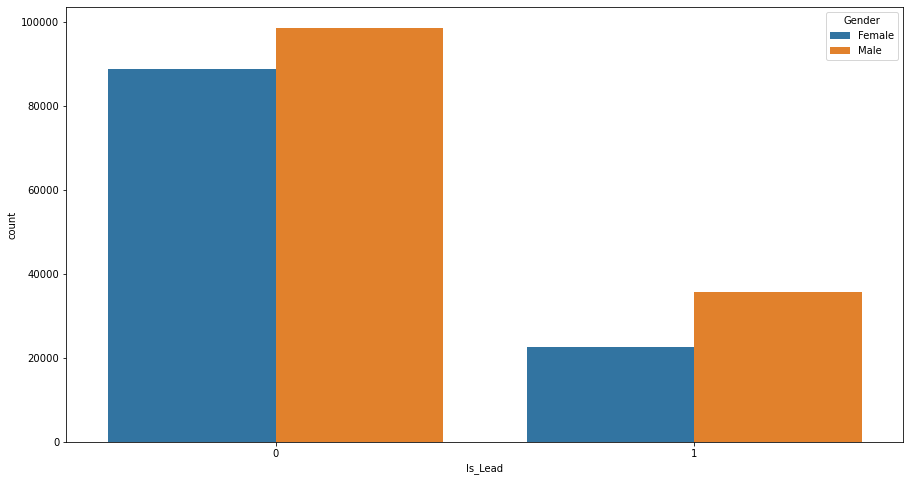

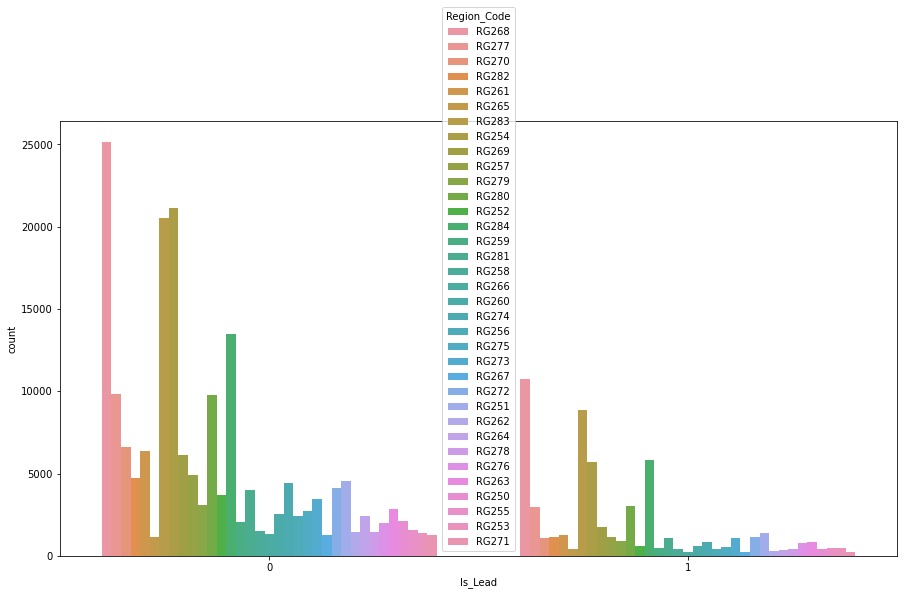

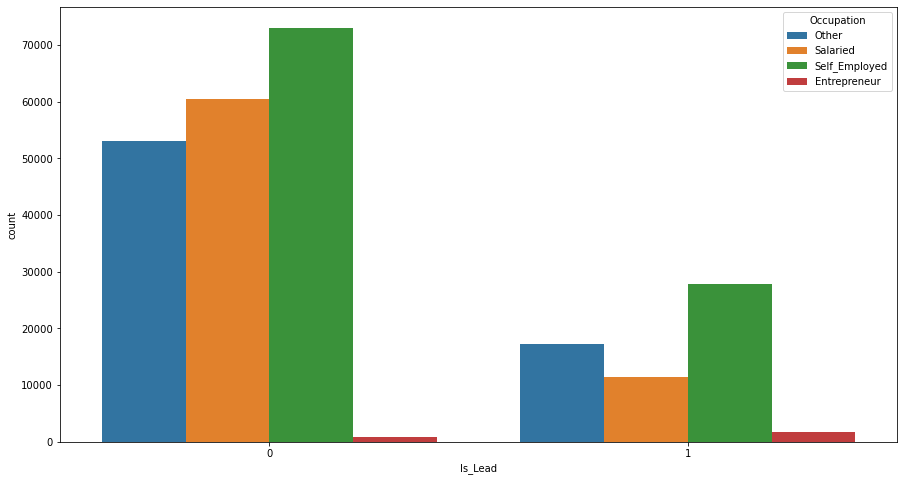

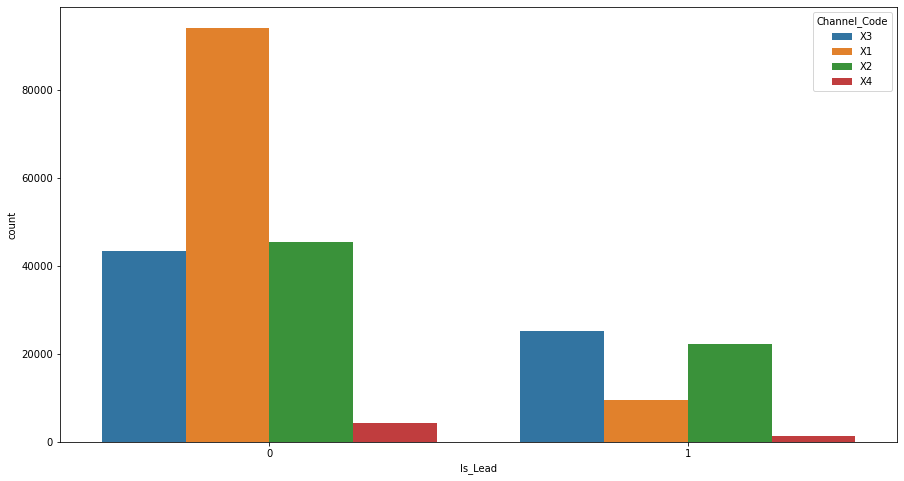

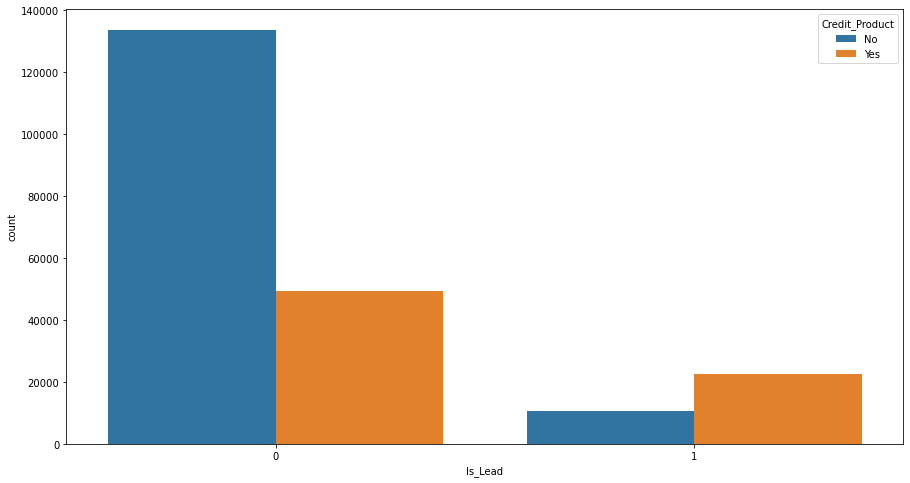

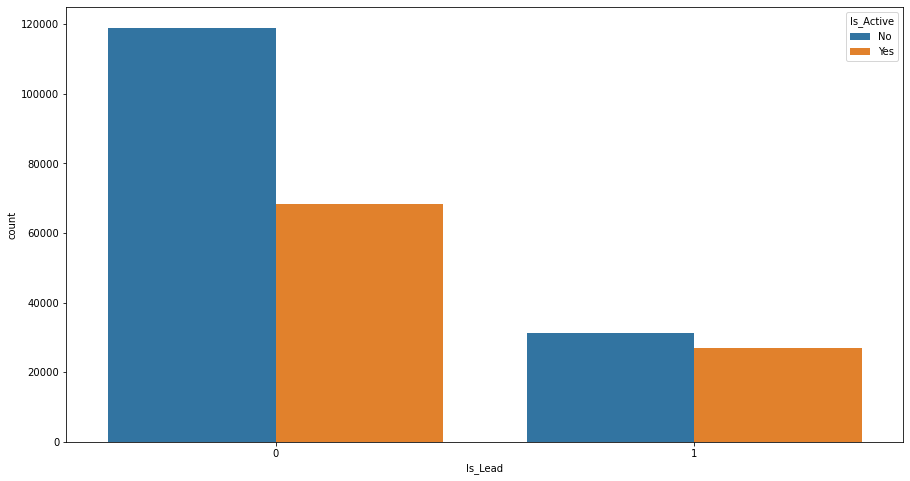

In [10]:
for i in [ 'Gender'  , 'Region_Code' , 'Occupation' , 'Channel_Code' , 'Credit_Product' , 'Is_Active'  ]:
    
    plt.figure (figsize=(15,8))

    sns.countplot (x ="Is_Lead", hue =i, data =train );

### **Data Mods**

In [11]:
df = ( train [ train['Is_Lead'] == 1 ]  ['Region_Code'].value_counts()  )  /  train ['Region_Code'].value_counts()

df.sort_values (ascending=False)

RG283    0.302047
RG284    0.301035
RG268    0.299800
RG276    0.277858
RG253    0.258881
RG265    0.258732
RG273    0.237714
RG280    0.235538
RG255    0.232408
RG251    0.232101
RG277    0.231951
RG279    0.225604
RG263    0.221861
RG269    0.221671
RG258    0.220400
RG272    0.219916
RG278    0.219539
RG281    0.218732
RG254    0.212854
RG259    0.193735
RG282    0.192143
RG257    0.191772
RG260    0.190997
RG262    0.180649
RG271    0.169261
RG261    0.167955
RG275    0.167334
RG274    0.164964
RG250    0.157452
RG267    0.148965
RG270    0.144301
RG256    0.140850
RG266    0.139417
RG252    0.138124
RG264    0.137129
Name: Region_Code, dtype: float64

In [12]:
train ['Region_Code'] .replace ( [ 'RG283'  , 'RG284'  , 'RG268'  , 'RG276' , 
                                   'RG253'  , 'RG265'  , 'RG273'  , 'RG280' , 
                                   'RG255'  , 'RG251'  , 'RG277'  , 'RG279' , 
                                   'RG263'  , 'RG269'  , 'RG258'  , 'RG272' , 
                                   'RG278'  , 'RG281'  , 'RG254' ] ,       
                                   'R 1' , inplace=True )

train ['Region_Code'] .replace ( [ 'RG259' , 'RG282' , 'RG257' , 'RG260' , 'RG262' , 
                                   'RG271' , 'RG261' , 'RG275' , 'RG274' , 'RG250' , 
                                   'RG267' , 'RG270' , 'RG256' , 'RG266' , 'RG252' , 'RG264'] ,    
                                   'R 2'   , inplace=True )

In [13]:
test ['Region_Code'] .replace ( [ 'RG283'   , 'RG284'  , 'RG268' , 'RG276' , 
                                  'RG253'   , 'RG265'  , 'RG273' , 'RG280' , 
                                  'RG255'   , 'RG251'  , 'RG277' , 'RG279' , 
                                  'RG263'   , 'RG269'  , 'RG258' , 'RG272' , 
                                  'RG278'   , 'RG281'  , 'RG254' ] ,       
                                  'R 1' , inplace=True )

test ['Region_Code'] .replace ( [ 'RG259' , 'RG282' , 'RG257' , 'RG260' , 'RG262' , 
                                  'RG271' , 'RG261' , 'RG275' , 'RG274' , 'RG250' , 
                                  'RG267' , 'RG270' , 'RG256' , 'RG266' , 'RG252' , 'RG264'] ,  
                                  'R 2'   , inplace=True )

### **2.2.2 - Numeric Cols**

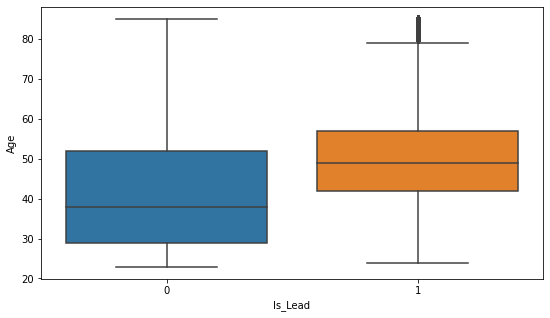

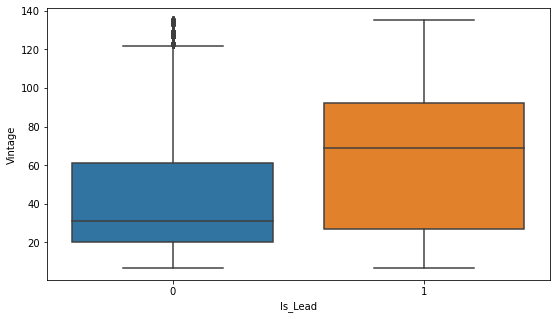

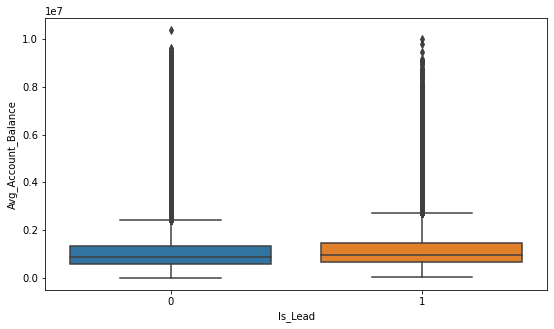

In [14]:
for i in [  'Age' , 'Vintage' , 'Avg_Account_Balance' ]:
    
    plt.figure (figsize=(9,5))

    sns.boxplot ( x='Is_Lead', y=i , data =train ) ;

In [15]:
train .drop ( ['Avg_Account_Balance'] , axis=1 , inplace=True )
test  .drop ( ['Avg_Account_Balance'] , axis=1 , inplace=True )

<a id='section_13'></a>
# **Part 3 - NaN** 

## **3.1 - Checking**

In [16]:
print ( 'NAN % on train data :\n',   np.round  (  train.isnull().sum() * 100   /  len(train)  ,   2 )      )
print ( '\n')
print ( 'NAN % on test data  :\n',   np.round  (  test.isnull().sum() * 100   /   len(test)   ,   2 )      )

NAN % on train data :
 Gender             0.00
Age                0.00
Region_Code        0.00
Occupation         0.00
Channel_Code       0.00
Vintage            0.00
Credit_Product    11.93
Is_Active          0.00
Is_Lead            0.00
dtype: float64


NAN % on test data  :
 Gender             0.00
Age                0.00
Region_Code        0.00
Occupation         0.00
Channel_Code       0.00
Vintage            0.00
Credit_Product    11.89
Is_Active          0.00
dtype: float64


<a id='section_14'></a>
# **Part 4 - Encode , Impute , Transform** 

## **4.1 - Nominal Encode**

In [17]:
train  =  pd.get_dummies ( train  , drop_first = True )
test   =  pd.get_dummies ( test   , drop_first = True )

## **4.2 - KNN Impute**

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer   (n_neighbors = 2)

train   = pd.DataFrame ( imputer.fit_transform(train) , columns = train.columns) 
test    = pd.DataFrame ( imputer.fit_transform(test)  , columns = test.columns) 

## **4.3 - Scale Transform**

As we are using Random Forest Classifier , so we dont have to scale transform the data

<a id='section_15'></a>
# **Part 5 - Feature Selection**

In [19]:
x =  train.drop ( ['Is_Lead'] , axis=1 )
y =  train ['Is_Lead']

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit ( x , y )

RandomForestClassifier()

In [21]:
table  =  pd.DataFrame   (  data = { 'Features' : x.columns  , 'Importance ratio' : rf.feature_importances_.tolist() }    )

table.sort_values        (  by=['Importance ratio'] , ascending=False , inplace=True )

print (table.head(50))

                    Features  Importance ratio
0                        Age          0.420075
1                    Vintage          0.386092
5        Occupation_Salaried          0.034378
8            Channel_Code_X3          0.027481
11             Is_Active_Yes          0.025381
7            Channel_Code_X2          0.024680
10        Credit_Product_Yes          0.021756
4           Occupation_Other          0.015819
6   Occupation_Self_Employed          0.015059
2                Gender_Male          0.014356
3            Region_Code_R 2          0.011723
9            Channel_Code_X4          0.003201


In [22]:
train.drop ( [ 'Channel_Code_X4' ] , axis=1 , inplace=True )

test.drop  ( [ 'Channel_Code_X4' ] , axis=1 , inplace=True )

<a id='section_16'></a>
# **Part 6 - Model Building**

In [23]:
from  sklearn.model_selection   import  train_test_split , KFold , RandomizedSearchCV , cross_val_score
from  sklearn.metrics           import  roc_auc_score         

from  sklearn.ensemble          import  RandomForestClassifier


x =  train.drop ( ['Is_Lead'] , axis=1 )
y =  train ['Is_Lead']

kf  =  KFold (shuffle=True, n_splits=10, random_state=0) 

## **6.1 - SMOTE**

In [24]:
from    imblearn.combine            import    SMOTEENN

cs   =  SMOTEENN ()

X,Y  =  cs.fit_resample(x,y)

X.shape

(192009, 11)

In [25]:
x_train , x_test , y_train , y_test  =   train_test_split ( X , Y , test_size = 0.25 , random_state = 0 )

## **6.2 - RFC**

In [26]:
clf      =   RandomForestClassifier ( n_estimators=400 , criterion='entropy', max_depth=60 , min_samples_leaf=1  , random_state=0 )

clf.fit      ( x_train , y_train )

y_pred   =   clf.predict ( x_test )

score    =   roc_auc_score ( y_pred , y_test )

print ('roc_auc score : ' , round(score,2)  )

roc_auc score :  0.97


## **6.3 - Fitting final model into entire data**

In [27]:
clf.fit ( X , Y )

RandomForestClassifier(criterion='entropy', max_depth=60, n_estimators=400,
                       random_state=0)

<a id='section_17'></a>
# **Part 7 - Submission**

In [28]:
ls          =  test.columns.tolist()

in_data     =  test [ls]

out_data    =  clf.predict (in_data)

In [29]:
testfile   =  pd.read_csv ('dataset/data_test.csv')
submit     =  pd.DataFrame()

In [30]:
submit ['ID']        =  testfile['ID']
submit ['Is_Lead']   =  out_data

# submit.to_csv  ( 'Submission_File.csv' , index = False , header = True )